<a href="https://colab.research.google.com/github/itsvipa/ctm-codebar-nov-22-planning/blob/main/Copy_of_codebar_workshop_tasks_1_2_and_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code for Living (Python for Data Engineering)

In this session we’ll be taking a look at harnessing the power of data to aid decision making for things like groceries and everyday purchases. We’ll get hands on with sourcing and making sense of the data, and then using it to answer some interesting questions, using techniques from fields like optimisation and machine learning.

### Tasks:
1. Find the cheapest supermarket for a given shopping basket
2. Find out if you would be able to save oney by shopping at more than one supermarket.
3. Using a second dataset and a ML (Machine Learning) model, come up with a cheap basket that is also nutritionally better. (Optional)
4. Create a function that is able to recommend similar items in the basket that may be better nutritionally. (Optional)

### Before you start:
Run the command below to download the data needed for this exercise; There should be three .csv files downloaded: 

*   products.csv
*   prices.csv
*   nutrition_small.csv.gz

NOTE: A command (sometimes abbrieviated as cmd) is a way for users to send 
instructions to the computer for it to process. In this case, the cmd is asking the computer to copy the files from this location in github, into this exercise

In [4]:
!git clone https://github.com/itsvipa/ctm-codebar-nov-22-planning.git

Cloning into 'ctm-codebar-nov-22-planning'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 41 (delta 19), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (41/41), done.


## Task One - Find the cheapest supermarket for your groceries

First, import pandas into your program:

In [5]:
import pandas as pd

Pandas is a python library that is used for data manipulation and analysis by data into DataFrames this data can be in the form of dictionaries, TSVs CSVs and more. More info on Pandas can be found at https://pandas.pydata.org/ and https://realpython.com/pandas-read-write-files/ 


Then items in the basket being used for this exercise are:

In [6]:
basket = [
    [28798, "Tetley Original Tea Bags x240"], 
    [34398, "Cravendale Whole Milk"],
    [30904, "Kellogg's Rice Krispies"],
    [26457,	"Tropicana Pineapple Juice"],
    [28095, "Diet Coke Bottles"],
    [33442, "Loyd Grossman Tomato & Basil Pasta Sauce"],
    [27161,	"Strings & Things Cheestrings Cheese Snack"],
    [31863,	"Mars 4 pack Ice Cream Bars"],
    [32002,	"Tilda Microwave Coconut Basmati Rice"],
    [86547,	"Knorr Chicken Stock Pot 4 Pack"],
    [84095,	"Arla skyr Fat Free Natural Yogurt"],
    [33255,	"Alpro Almond Long Life Drink"],
    [43809,	"Energizer Max 9V Batteries"],
    [25828,	"Robinsons Crushed Lime & Mint Fruit Cordial"],
    [32248,	"Sensations Balsamic Vinegar & Caramelised Onion Sharing Crisps"],
    [47361,	"Lynx Africa Body Spray Deodorant Aerosol"],
    [32774,	"Heinz Spaghetti"],
    [92101,	"Chicago Town Cheese Pizza Tomato Stuffed Crust Takeaway"],
    [110105, "McCain Home Chips Straight"],
    [44797,	"Fairy Original Washing Up Liquid"],
    [40915,	"Fairy Non Bio Washing Liquid for Sensitive Skin 1.33L 38 Washes	"],
    [24091,	"Nissin Soba Yakitori Noodles"],
    [42002,	"Yakult Yogurt Drink"],	
    [83092,	"Jammie Dodgers"],
    [20272,	"Quorn Vegan Chicken Free Slices 100G"],	
    [33492,	"Linda McCartney's Mozzarella Quarter Pounder Burger"],
    [51657,	"Purina ONE Adult Dry Cat Food Chicken & Wholegrains"],
    [24341,	"Birds Eye 4 Original Beef Burgers With Onions"],
    [109986, "Cathedral City Lighter Mature Cheese"],
    [27526,	"Filippo Berio Mild & Light Olive Oil"],
    [45238, "Bfree Pitta Breads Stone Baked Pittas"]
    ]

print(len(basket))

31


### Load the data 

The first stept to get price create two DataFrames for the product and price.

product.csv should contain information on the product name, the quantity,the product id etc

price.csv should contain infomation on the product price, the supermarket name, the product name etc

A pandas DataFrame is very similar to an excel spreadsheet or a table in a database.



In [7]:
product_df = pd.read_csv("/content/ctm-codebar-nov-22-planning/products.csv")
price_df = pd.read_csv("/content/ctm-codebar-nov-22-planning/prices.csv")

To show what the DataFrame actually looks like, we can just call the dataframe, like below

In [8]:
product_df

,id,name,measure_quantity,measure_amount,measure_unit,skus,price_count
0,20100,Lucozade Sport Orange,NaN,750,ml,"['302012236', '50368011', '1000273982470']",1
1,20101,Red Bull Sugarfree,NaN,473,ml,"['298026024', '7922076', '576040011']",3
2,20102,All Shook Up Spritz Pink Grapefruit & Lavender...,NaN,NaN,NaN,['305986034'],0
3,20103,Gatorade Orange 500ml,NaN,NaN,NaN,"['287043066', '8008530']",0
4,20104,Purdeys Rejuvenation Fruit Drink 330Ml,NaN,330,ml,"['272855015', '7720116', '14533011', '34395901...",3
...,...,...,...,...,...,...,...
81665,149214,TRIP CBD Infused Elderflower Mint,NaN,250,ml,"['8040121', '563191011']",2
81666,149215,TRIP CBD Infused Lemon Basil,NaN,250,ml,"['8040125', '563190011']",2
81667,149216,TRIP CBD Infused Peach Ginger,NaN,250,ml,"['8040137', '563192011']",2
81668,149596,Smirnoff Red Label Vodka 35cl,NaN,350,ml,"['256554689', '2412368', '119513011']",2


Try and call the price_df DataFrame and have a look at some of the data. Can you see any similaries between the two?

In [9]:
price_df

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
0,20100,Lucozade Sport Orange,asda,True,1.25,0.17,100.0,ml,2022-10-26T15:00:00.000Z
1,20101,Red Bull Sugarfree,morrisons,True,2.30,0.49,100.0,ml,2022-10-26T18:00:00.000Z
2,20101,Red Bull Sugarfree,sainsburys,True,2.30,0.49,100.0,ml,2022-10-26T11:00:00.000Z
3,20101,Red Bull Sugarfree,tesco,False,3.40,0.49,100.0,ml,2022-10-26T14:00:00.000Z
4,20104,Purdeys Rejuvenation Fruit Drink 330Ml,sainsburys,True,1.40,0.42,100.0,ml,2022-10-26T12:00:00.000Z
...,...,...,...,...,...,...,...,...,...
94855,149216,TRIP CBD Infused Peach Ginger,ocado,True,2.00,0.80,100.0,ml,2022-10-26T14:00:00.000Z
94856,149216,TRIP CBD Infused Peach Ginger,sainsburys,True,2.00,0.80,100.0,ml,2022-10-26T12:00:00.000Z
94857,149596,Smirnoff Red Label Vodka 35cl,tesco,True,10.00,2.86,100.0,ml,2022-10-26T10:00:00.000Z
94858,149596,Smirnoff Red Label Vodka 35cl,sainsburys,True,10.50,3.00,100.0,ml,2022-10-26T11:00:00.000Z


### Get the basket ids

The id column for both prices and product are the exact same. This means that the ids can be used to find the products and their price, within the price dataset. To do this, first a a list of the ids for the basket is needed

Using a for loop, get a list of the product ids from the basket object

In [10]:
basket_ids = [i[0] for i in basket]



Return the basket ids to check that the list is correct

In [11]:
basket_ids

[28798,
 34398,
 30904,
 26457,
 28095,
 33442,
 27161,
 31863,
 32002,
 86547,
 84095,
 33255,
 43809,
 25828,
 32248,
 47361,
 32774,
 92101,
 110105,
 44797,
 40915,
 24091,
 42002,
 83092,
 20272,
 33492,
 51657,
 24341,
 109986,
 27526,
 45238]

Using the list ids, the data can be filtered to create a DataFrame with just the items in the basket

A new data frame called product_basket is created by looking at the product_df and picking the products that have ids that match the basket_ids list above

In [12]:
product_basket = product_df[product_df['id'].isin(basket_ids)]

In [13]:
product_basket

,id,name,measure_quantity,measure_amount,measure_unit,skus,price_count
171,20272,Quorn Vegan Chicken Free Slices 100G,NaN,100,g,"['1000036534591', '409621011', '300544928', '7...",7
3920,24091,Nissin Soba Yakitori Noodles,NaN,89,g,"['7880330', '358649011', '394012011', '9100030...",7
4157,24341,Birds Eye 4 Original Beef Burgers With Onions,NaN,227,g,"['39291', '111245011', '254750569', '7062745',...",7
5577,25828,Robinsons Crushed Lime & Mint Fruit Cordial,NaN,500,ml,"['298026060', '7893476', '1000000581841', '395...",7
6168,26457,Tropicana Pineapple Juice,NaN,850,ml,"['287294534', '910001811525', '7736698', '2807...",7
6829,27161,Strings & Things Cheestrings Cheese Snack,8.0,160,g,"['910000563392', '111504011', '273196994', '75...",8
7170,27526,Filippo Berio Mild & Light Olive Oil,NaN,500,ml,"['3817506', '33508011', '112993011', '25495826...",7
7700,28095,Diet Coke Bottles,NaN,1000,ml,"['252047858', '3723975', '20947011', '11392001...",7
8338,28798,Tetley Original Tea Bags x240,240.0,750,g,"['256093024', '3124932', '113676011', '32744',...",8
10318,30904,Kellogg's Rice Krispies,NaN,700,g,"['910000396129', '7427688', '112094011', '2681...",7


### Filtering the data to find the cheapest supermarket

To filter a DataFrame in pandas you can attach a bracket to you DataFrame, then and your filtering parameters inside. In the example above, we have stated that the new DataFrame product_basket, should be made using data from the product_df, but only if the basket_ids, are in the column `id`

Using the example above, create a new DataFrame that only contains the prices of products, which match the basket_ids list

In [14]:
basket_prices = price_df[price_df['id'].isin(basket_ids)]

Return the new DataFrame to check it is correct

In [15]:
basket_prices

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
307,20272,Quorn Vegan Chicken Free Slices 100G,morrisons,True,2.39,2.39,100.0,g,2022-10-26T15:00:00.000Z
308,20272,Quorn Vegan Chicken Free Slices 100G,asda,True,2.40,2.40,100.0,g,2022-10-26T14:00:00.000Z
309,20272,Quorn Vegan Chicken Free Slices 100G,coop,NaN,2.40,NaN,NaN,NaN,2022-10-26T11:00:00.000Z
310,20272,Quorn Vegan Chicken Free Slices 100G,ocado,True,2.40,2.40,100.0,g,2022-10-26T09:00:00.000Z
311,20272,Quorn Vegan Chicken Free Slices 100G,sainsburys,True,2.40,2.40,100.0,g,2022-10-26T10:00:00.000Z
...,...,...,...,...,...,...,...,...,...
81291,110105,McCain Home Chips Straight,tesco,True,3.00,0.25,100.0,g,2022-10-26T07:00:00.000Z
81292,110105,McCain Home Chips Straight,morrisons,True,3.99,0.25,100.0,g,2022-10-26T16:00:00.000Z
81293,110105,McCain Home Chips Straight,asda,True,4.00,0.25,100.0,g,2022-10-26T15:00:00.000Z
81294,110105,McCain Home Chips Straight,sainsburys,True,4.00,0.25,100.0,g,2022-10-26T14:00:00.000Z


Notice in the DataFrame above, there is a column called `retailer` with all the supermarket names. We can use a pandas method called `.unique()` to get a list of all the supermarkets 

In [16]:
basket_prices['retailer'].unique()

array(['morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco',
       'waitrose', 'aldi'], dtype=object)

When filtering DataFrames in pandas, you can attach methods such as `.unique()` and `.count()` to manipulate the data further

Another method within pandas that can be useful is `.group_by()`. `.group_by()` is used to split the data into certain groups, defined by the user. 

To check that the retailers have all the products in our basket, we can use `group_by()` and `.count()` to group the data by the suoermarket name, then count the number of products that supermarket has.

In [17]:
basket_prices.groupby(['retailer']).count()

,id,name,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
retailer,,,,,,,,
aldi,3,3,3,3,3,3,3,3
asda,31,31,31,31,31,31,31,31
coop,31,31,0,31,0,0,0,31
morrisons,31,31,31,31,31,31,31,31
ocado,31,31,31,31,31,31,31,31
sainsburys,31,31,31,31,31,31,31,31
tesco,31,31,31,31,31,31,31,31
waitrose,31,31,31,31,31,31,31,31


Looking at the data above, is there any supermarket we should not include in our analysis? Why? 

there should be one supermarket, that does not have reliable data, and therefore, can be exclueded from the comparison.

Next, create a list of the retailers that we DO want to test:

In [18]:
retailers_to_test = ['morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco', 'waitrose']

Then using the basket_prices DataFrame made previously, create a new DataFrame that only has the retailers we are testing

In [19]:
compare_price_basket = basket_prices[basket_prices['retailer'].isin(retailers_to_test)]

In [20]:
compare_price_basket

,id,name,retailer,available,price,price_per_unit,price_unit_amount,price_unit,crawl_date
307,20272,Quorn Vegan Chicken Free Slices 100G,morrisons,True,2.39,2.39,100.0,g,2022-10-26T15:00:00.000Z
308,20272,Quorn Vegan Chicken Free Slices 100G,asda,True,2.40,2.40,100.0,g,2022-10-26T14:00:00.000Z
309,20272,Quorn Vegan Chicken Free Slices 100G,coop,NaN,2.40,NaN,NaN,NaN,2022-10-26T11:00:00.000Z
310,20272,Quorn Vegan Chicken Free Slices 100G,ocado,True,2.40,2.40,100.0,g,2022-10-26T09:00:00.000Z
311,20272,Quorn Vegan Chicken Free Slices 100G,sainsburys,True,2.40,2.40,100.0,g,2022-10-26T10:00:00.000Z
...,...,...,...,...,...,...,...,...,...
81291,110105,McCain Home Chips Straight,tesco,True,3.00,0.25,100.0,g,2022-10-26T07:00:00.000Z
81292,110105,McCain Home Chips Straight,morrisons,True,3.99,0.25,100.0,g,2022-10-26T16:00:00.000Z
81293,110105,McCain Home Chips Straight,asda,True,4.00,0.25,100.0,g,2022-10-26T15:00:00.000Z
81294,110105,McCain Home Chips Straight,sainsburys,True,4.00,0.25,100.0,g,2022-10-26T14:00:00.000Z


Now we have a dataframe that contains all the products, the supermarkets and the price, we can do one more aggregation to find the cheapest supermarket.

Try grouping the data in compare_price_basket by `retailer`, and adding the price of the items in that supermarket, to find the cheapest place

In [21]:
compare_price_basket.groupby('retailer').sum()['price']

retailer
asda          80.98
coop          96.20
morrisons     87.31
ocado         92.70
sainsburys    80.65
tesco         81.38
waitrose      95.75
Name: price, dtype: float64

Which supermarket was the cheapest? Are you suprised by the result??

##Task Two - How much more can you save if you split the basket between supermarkets (2 stores, 3 stores)?

Now we know the cheapest supermarket over all, what happens if we decide to do our shopping in different supermarkets. To work this out we are going to use another python module called itertools. 


Itertools is a module that makes complex iterations (for loops) much simpler, and more effective.

Note: An iterator is an object that cam be used in a for loop. A good example for this is a list of strings 


More information on the iteratools module can be found here: 

https://realpython.com/python-itertools/

https://docs.python.org/3/library/itertools.html

### Get the cheapest basket

For this section, we will use itertools to find all possible combinations of 2 supermarkets, using the retailers_to_test list we created in the previous exercise.

First lets start by importing the module

In [ ]:
import itertools

One module from itertools that can be used to to this is [`.combinations()`](https://www.geeksforgeeks.org/python-itertools-combinations-function/). 

`.combinations()` takes in two arguments: 


1.   The iterator - In this case, that is the `retailers_to_test` list
2.   r - the size of the combinations; We want to keep this at 2 for now

Using `combinations()` can you print out a list of the potential pairs of supermarkets?

In [ ]:
retailer_pairs = [pairs for pairs in itertools.combinations(retailers_to_test, 2)]

In [ ]:
retailer_pairs

Now we have the potential pairs, its time to find the total of the basket if you were to shop at each pair of supermarkets.

In [ ]:
def get_cheapest_basket(retailer_list):
  retailer_price_basket = compare_price_basket[compare_price_basket['retailer'].isin(retailer_list)]
  return retailer_price_basket.sort_values('price').drop_duplicates(['id'])['price'].sum()

pair_basket_prices = [[r, get_cheapest_basket(r)] for r in retailer_pairs]
pair_basket_prices

[[('morrisons', 'asda'), 78.6],
 [('morrisons', 'coop'), 83.54],
 [('morrisons', 'ocado'), 82.46],
 [('morrisons', 'sainsburys'), 77.03],
 [('morrisons', 'tesco'), 78.51],
 [('morrisons', 'waitrose'), 84.04],
 [('asda', 'coop'), 77.68],
 [('asda', 'ocado'), 78.93],
 [('asda', 'sainsburys'), 77.44],
 [('asda', 'tesco'), 76.66],
 [('asda', 'waitrose'), 80.13],
 [('coop', 'ocado'), 86.14999999999999],
 [('coop', 'sainsburys'), 78.6],
 [('coop', 'tesco'), 79.48000000000002],
 [('coop', 'waitrose'), 87.29999999999998],
 [('ocado', 'sainsburys'), 79.14999999999999],
 [('ocado', 'tesco'), 79.48],
 [('ocado', 'waitrose'), 90.1],
 [('sainsburys', 'tesco'), 76.53],
 [('sainsburys', 'waitrose'), 80.15],
 [('tesco', 'waitrose'), 79.98]]

In [ ]:
def get_cheapest_store_combination(store_size):
  retailer_combinations = itertools.combinations(retailers_to_test, store_size)
  cheapest_stores = None
  cheapest_price = None
  for rc in retailer_combinations:
    current_price = get_cheapest_basket(rc)
    if not cheapest_price or current_price < cheapest_price:
      cheapest_stores = rc
      cheapest_price = current_price
  return cheapest_stores, cheapest_price

In [ ]:
get_cheapest_store_combination(2)

(('sainsburys', 'tesco'), 76.53)

In [ ]:
get_cheapest_store_combination(3)

(('morrisons', 'sainsburys', 'tesco'), 74.77000000000001)

In [ ]:
get_cheapest_store_combination(4)

(('morrisons', 'asda', 'sainsburys', 'tesco'), 73.06)

In [ ]:
get_cheapest_store_combination(5)

(('morrisons', 'asda', 'ocado', 'sainsburys', 'tesco'), 72.56)

In [ ]:
get_cheapest_store_combination(6)

(('morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco'), 72.51)

In [ ]:
get_cheapest_store_combination(7)

(('morrisons', 'asda', 'coop', 'ocado', 'sainsburys', 'tesco', 'waitrose'),
 72.51)

In [ ]:
x_data = range(1,8)
y_data = [get_cheapest_store_combination(num_of_stores)[1] for num_of_stores in x_data]

In [ ]:
y_data

[80.64999999999999, 76.53, 74.77000000000001, 73.06, 72.56, 72.51, 72.51]

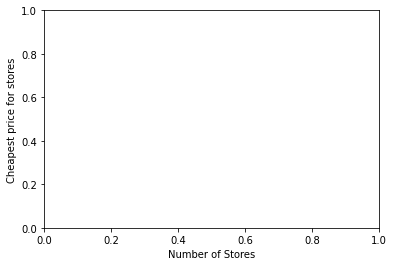

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(x_data, y_data)
plt.xlabel('Number of Stores')
plt.ylabel('Cheapest price for stores')
plt.show()

## Task Three (Optional) - Using a second dataset, come up with a cheaper basket that is also nutritionally beneficial

So far, we've found that some decent savings can be made by just changing where you shop! However, if you are sticking to the same items, there is a limit to how much you can save.

This task will take a look at the food you pick, and see how much you can save by changing what you eat (whilst still getting all the nutrition you need!)

####Loading the data
First, lets load in and take a look at a new dataset we are introducing, a table of nutritional information on a wide selection of items. 

In [ ]:
nutrition_df = pd.read_csv('/content/ctm-codebar-nov-22-planning/nutrition_small.csv.gz')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#display the dataset here so we can see what it looks like
nutrition_df

As you can see, there is a vast collection of nutritional information on a large variety of foods. However, there is one big issue - how do we link this information to the prices of the products?

#### Introducing the similarity join

If you compare the pricing dataframe and the nutritional dataframe side by side, just by looking at the product names you can see that there are a lot of products that are in both!

But, that names are not exactly the same, even though we know they are  referring to the same product.

How do we match these products together? We can use a tool for performing a method called a **similarity join**

In [ ]:
!pip install py-stringsimjoin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.4 MB/s 
     |████████████████████████████████| 661 kB 47.6 MB/s 
  Created wheel for py-stringsimjoin: filename=py_stringsimjoin-0.3.2-cp37-cp37m-linux_x86_64.whl size=3724098 sha256=bd83a56834a9318870d6f24f7e4ff6144e7a0a07fe13937debb6bb5b6c0abda3
  Stored in directory: /root/.cache/pip/wheels/7c/0d/a4/c0a779a4d196bed8ed41ca12be09a93e158e4fc974b59f9fd5
  Created wheel for py-stringmatching: filename=py_stringmatching-0.4.2-cp37-cp37m-linux_x86_64.whl size=2055565 sha256=d8bcb9823df51d82f27aa2e277cdb07b055b910ced69298a60da9051ae165eb5
  Stored in directory: /root/.cache/pip/wheels/7e/12/86/46f9378ae730550dd2f89cad50880e70d66cabedd90074f2d2
Successfully built py-stringsimjoin py-stringmatching


In [ ]:
import py_stringsimjoin as ssj
import py_stringmatching as sm

####What is a similarity join?
At its core, a similarity join take a look at 2 strings, and gives them a score based on how similar they are to each other.

Lets take a look at 2 products -

`Coke Can 250ml`

`Diet Coke Can 330ml`

We can split these names into individual words (sometimes referred to a tokens)

`[Coke, Can, 250ml]`

`[Diet, Coke, Can, 330ml]`

To compute a *Jaccard* similarity score:

$\text{Score} = \frac{ \text{Number of shared words} }{ \text{Total number of unique words}}$

In this case, the shared words are:

`[Coke, Can]`

and all the unique words between the 2 strings are:

`[Diet, Coke, Can, 250ml, 330ml]`

therefore: 

$\text{Score} = \frac{2}{5} = 0.4$

The higher the score is, the more similar the strings are. The lower the score is, the less similar the strings are.

#### Tokenisation

The first thing we need is a method to split strings into individual words/tokens

In [ ]:
alnum_tok = sm.AlphanumericTokenizer(return_set=True)

Lets give this a try:

In [ ]:
print('Diet Coke', alnum_tok.tokenize('Diet Coke'))
print('Diet-Coke', alnum_tok.tokenize('Diet-Coke'))

Diet Coke ['Diet', 'Coke']
Diet-Coke ['Diet', 'Coke']


## Before We Join:

The goal of joining is to pick the 'best' match from the possible options.
If there are multiple matches for the same product, we would want to prioritise:
- products that are from the UK
- products that have nutritional information filled out.

We also want to make sure all the product names are in lowercase.

In [ ]:
nutrition_columns = [
    'nutriments.fat_100g',
    'nutriments.proteins_100g',
    'nutriments.sugars_100g',
    'nutriments.salt_100g',
    'nutriments.energy-kcal_100g',
    'nutriments.carbohydrates_100g'
    ]

#this is required by the join module.
nutrition_df['uid'] = range(0, len(nutrition_df))

#add a true/false column to check if the row has nutritional info
nutrition_df['has_nutritional_info'] = nutrition_df[nutrition_columns].notna().any(axis='columns')

#add a true/false column to check if the product is from the UK
nutrition_df['is_uk'] = nutrition_df['countries_tags'].apply(lambda x: ('en:united-kingdom' in eval(x)) if isinstance(x, str) else False)

#add a column to both dataframes with the product names in lowercase
nutrition_df['product_name_lower'] = nutrition_df['product_name'].apply(lambda x: x.lower())
product_df['name_lower'] = product_df['name'].apply(lambda x: x.lower())

###Perform the join

Next, lets perform the join!
This function creates a table of all the possible matches for each product, and their similarity score. It is important to pick a threshold/minimum score, so that matches with a score lower than this are not included.

In [ ]:
output_pairs = ssj.jaccard_join(
    product_df, nutrition_df, 
    'id', 'uid', 'name_lower', 'product_name_lower', 
    alnum_tok, 0.6, 
    l_out_attrs=['name'], r_out_attrs=['product_name', 'has_nutritional_info', 'is_uk'])

###Pick the best Match:

The `output_pairs` has multiple results for each product. Next, we want to pick the best match for each product and remove all the duplicates

In [ ]:
deduped_pairs = output_pairs.sort_values(['_sim_score', 'r_has_nutritional_info', 'r_is_uk'], ascending=False).drop_duplicates(['l_id'])
deduped_pairs

### Join the prices with nutrition
Now we have the matching table, lets make use of that to join the prices table and nutrition table together! For this, we will use [df.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html), which joins 2 tables together based on their ids.

In [ ]:
#join the prices with the pairs table
combined_df = price_df.merge(deduped_pairs,left_on='id',right_on='l_id')

#join the combined table with the nutrition table
combined_df = combined_df.merge(nutrition_df,left_on='r_uid',right_on='uid')
combined_df

### Looking at nutrition and prices

Next, lets use our new table to find out what the cheapest products are for the nutritional value they provide!

First, lets increase the amount of data we can see to better see our results:

In [ ]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Next, we should filter the combined table to remove missing data, and pick only the most nutritious food. 

We will also need to make sure both the price and nutrition are using the same units (per 100g).

In [ ]:
combined_filter = (
    combined_df['price_unit_amount'] == 100
    ) & (combined_df['nutriments.energy-kcal_100g'].notna()
    ) & (combined_df['nutriments.energy-kcal_100g'] > 0
    ) & (combined_df['price_per_unit'] > 0
    ) & (combined_df['nutriscore_grade'].isin(['a','b'])
)

df_to_analyse = combined_df[combined_filter].copy(deep=True)

Next, let create a new column to work out the cost for a full days worth of calories from each product, and use it to find the cheapest products

In [ ]:
#Work out the price per 2000 calories for each product
df_to_analyse['price_per_2000kcal'] = (df_to_analyse['price_per_unit'] / df_to_analyse['nutriments.energy-kcal_100g']) * 2000
df_to_analyse.sort_values('price_per_2000kcal').head(100)

You can now also have a look at the other nutrition columns to see if other foods are better for other types of nutrition.

In [ ]:
df_to_analyse['price_per_50g_protein'] = (df_to_analyse['price_per_unit'] / df_to_analyse['nutriments.proteins_100g']) * 50
df_to_analyse.sort_values('price_per_50g_protein').head(100)

## Task 4 - ML

In [ ]:
nutrition_df['categories_list'] = nutrition_df['categories_hierarchy'].apply(lambda x: eval(x) if isinstance(x, str) else [])
en_nutrition_df = nutrition_df[nutrition_df['categories_list'].apply(lambda x: (len(x) > 0) and len([not_en for not_en in x if not_en.split(':')[0] != 'en']) == 0)].copy()

In [ ]:
# There are some terms with occurrence as low as 1.
terms_list = []
for category_list in en_nutrition_df['categories_list']:
  for c in category_list:
    terms_list.append(c)
len(terms_list)

In [ ]:
categories_df = pd.DataFrame(terms_list, columns=['category'])
column_counts = categories_df.groupby('category').size().reset_index(name='count')
categories_to_use = column_counts[column_counts['count'] > 200]
categories_to_use

In [ ]:
hierarchy_df = en_nutrition_df.groupby('categories_hierarchy').size().reset_index(name='count')
categories_to_drop = hierarchy_df[hierarchy_df['count'] < 2]
categories_to_drop

In [ ]:
en_nutrition_df['train_categories'] = en_nutrition_df['categories_list'].apply(lambda categories: [c for c in categories if c in categories_to_use['category'].values])
label_filter = (
    en_nutrition_df['train_categories'].apply(lambda x: len(x) > 0)
    ) & (~en_nutrition_df['categories_hierarchy'].isin(categories_to_drop['categories_hierarchy']))
labelled_nutrition_df = en_nutrition_df[label_filter]
len(labelled_nutrition_df)

In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf

from sklearn.model_selection import train_test_split
from ast import literal_eval
import numpy as np

In [ ]:
test_split = 0.1

# Initial train and test split.
train_df, test_df = train_test_split(
    labelled_nutrition_df,
    test_size=test_split,
    stratify=labelled_nutrition_df["categories_hierarchy"].values,
)

# Splitting the test set further into validation
# and new test sets.
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of rows in training set: {len(train_df)}")
print(f"Number of rows in validation set: {len(val_df)}")
print(f"Number of rows in test set: {len(test_df)}")

In [ ]:
terms = tf.ragged.constant(categories_to_use['category'].values)
lookup = tf.keras.layers.StringLookup(output_mode="multi_hot")
lookup.adapt(terms)
vocab = lookup.get_vocabulary()


def invert_multi_hot(encoded_labels):
    """Reverse a single multi-hot encoded label to a tuple of vocab terms."""
    hot_indices = np.argwhere(encoded_labels == 1.0)[..., 0]
    return np.take(vocab, hot_indices)


print("Vocabulary:\n")
print(vocab)

In [ ]:
sample_label = train_df["train_categories"].iloc[0]
print(f"Original label: {sample_label}")

label_binarized = lookup([sample_label])
print(f"Label-binarized representation: {label_binarized}")

In [ ]:
train_df["product_name_lower"].apply(lambda x: len(x.split(" "))).describe()

In [ ]:
max_seqlen = 20
batch_size = 128
padding_token = "<pad>"
auto = tf.data.AUTOTUNE


def make_dataset(dataframe, is_train=True):
    labels = tf.ragged.constant(dataframe["train_categories"].values)
    label_binarized = lookup(labels).numpy()
    dataset = tf.data.Dataset.from_tensor_slices(
        (dataframe["product_name_lower"].values, label_binarized)
    )
    dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
    return dataset.batch(batch_size)

In [ ]:
train_dataset = make_dataset(train_df, is_train=True)
validation_dataset = make_dataset(val_df, is_train=False)
test_dataset = make_dataset(test_df, is_train=False)

In [ ]:
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    print(" ")

In [ ]:
vocabulary = set()
train_df["product_name_lower"].str.lower().str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

In [ ]:
text_vectorizer = layers.TextVectorization(
    max_tokens=vocabulary_size, ngrams=3, output_mode="tf_idf"
)

# `TextVectorization` layer needs to be adapted as per the vocabulary from our
# training set.
with tf.device("/CPU:0"):
    text_vectorizer.adapt(train_dataset.map(lambda text, label: text))

train_dataset = train_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
validation_dataset = validation_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)
test_dataset = test_dataset.map(
    lambda text, label: (text_vectorizer(text), label), num_parallel_calls=auto
).prefetch(auto)

In [ ]:
def make_model():
    shallow_mlp_model = keras.Sequential(
        [
            layers.Dense(1024, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(512, activation="relu"),
            layers.Dropout(0.3),
            layers.Dense(lookup.vocabulary_size(), activation="sigmoid"),
        ]  # More on why "sigmoid" has been used here in a moment.
    )
    return shallow_mlp_model

In [ ]:
epochs = 5

shallow_mlp_model = make_model()
shallow_mlp_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["top_k_categorical_accuracy"]
)

history = shallow_mlp_model.fit(
    train_dataset, validation_data=validation_dataset, epochs=epochs
)


def plot_result(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title("Train and Validation {} Over Epochs".format(item), fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()


plot_result("loss")
plot_result("top_k_categorical_accuracy")

In [ ]:
_, categorical_acc = shallow_mlp_model.evaluate(test_dataset)


In [ ]:
# Create a model for inference.
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

# Create a small dataset just for demoing inference.
inference_dataset = make_dataset(test_df.sample(100), is_train=False)
text_batch, label_batch = next(iter(inference_dataset))
predicted_probabilities = model_for_inference.predict(text_batch)

# Perform inference.
for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()[None, ...]
    print(f"Abstract: {text}")
    print(f"Label(s): {invert_multi_hot(label[0])}")
    predicted_proba = [proba for proba in predicted_probabilities[i]]
    top_5_labels = [
        x
        for x in sorted(
            zip(predicted_probabilities[i], lookup.get_vocabulary()),
            key=lambda pair: pair[0],
            reverse=True,
        )
    ][:5]
    print(top_5_labels)
    print(" ")

In [ ]:
# Create a model for inference.
model_for_inference = keras.Sequential([text_vectorizer, shallow_mlp_model])

predicted_probabilities = model_for_inference.predict(product_df['name_lower'].values)

# Perform inference.

predicted_labels = []
for i, predicted_proba in enumerate(predicted_probabilities):
    top_5_labels = [
        x
        for _, x in sorted(
            zip(predicted_proba, lookup.get_vocabulary()),
            key=lambda pair: pair[0],
            reverse=True,
        )
    ][:5]
    if i % 1000 == 0:
      print('processed {} predictions'.format(i))
    predicted_labels.append(top_5_labels)

In [ ]:
product_df['predicted_labels'] = predicted_labels
product_df

In [ ]:
bread_products = product_df[product_df['predicted_labels'].apply(lambda x: 'en:white-breads' in x)]
bread_prices = bread_products.merge(price_df,left_on='id',right_on='id')
bread_prices.sort_values('price_per_unit').head(100)